**Importowanie pakietów**

In [39]:
import pandas as pd
import numpy as np
from datetime import *

import seaborn as sns
import matplotlib.pyplot as plt

### **Eksploracja zbioru danych**

**Wyświetlenie pierwszych 5 obserwacji w celu przeprowadzenia wstępnej analizy**

In [40]:
taxi_dataset = pd.read_csv('datasets/taxi_dataset.csv')
print(taxi_dataset.shape)
taxi_dataset.head()

(200000, 23)


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,e2afbb4f62fb3865c4d928a39e8a4d1e711ea8da,5cee8ec7dd48dd171270a4f56ac537aa955fb0404ea5ad...,2017-11-03 11:45:00 UTC,2017-11-03 11:45:00 UTC,365.0,2.3,NaN,NaN,NaN,NaN,...,0.0,7.20,Cash,Metro Group,NaN,NaN,NaN,NaN,NaN,NaN
1,a663e8249660b7a3ae13c9a39378ff495564e8e6,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 20:30:00 UTC,2016-10-28 20:30:00 UTC,192.0,1.4,NaN,NaN,NaN,NaN,...,0.0,5.60,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
2,a99a7309aea3cf70eed1644c254eb30b150ac4f2,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 20:45:00 UTC,2016-10-28 20:45:00 UTC,328.0,2.1,NaN,NaN,NaN,NaN,...,0.0,7.60,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
3,ad0d9e702d67b0e9e7b85dd0750605ff06389c4f,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-28 21:45:00 UTC,2016-10-28 22:00:00 UTC,706.0,7.6,NaN,NaN,NaN,NaN,...,2.0,22.40,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN
4,350b48036f17d07f79abf53d04b811da8b6c264c,f871ebb01073ef31155285c13e4cfeb91a9f89492e0cbd...,2016-10-29 09:45:00 UTC,2016-10-29 10:30:00 UTC,3407.0,50.7,NaN,NaN,NaN,NaN,...,0.0,0.01,Cash,303 Taxi,NaN,NaN,NaN,NaN,NaN,NaN


Zbór danych składa się z 200,000 obserwacji oraz 23 kolumn dotyczących przejazdów taksówek.  

Do najważniejszych kolumn w zbiorze danych należą:
- **unique_key** - zawiera numer id przejazdu, który powinien być unikalny w całej bazie danych
- **taxi_id** - numer identyfikacyjny taksówki
- **trip_start_timestamp** / **trip_end_timestamp** - informacje dotyczące momentu rozpoczęcia/zakończenia kursu
- **trip_seconds** - czas podróży
- **trip_miles** - przejechany dystans
- **trip_total** - skumulowana wartość opłaty za kurs
- **payment_type** - rodzaj płatności
- **company** - firma wykonująca zlecenie
- **pickup_location** / **dropoff_location** - współrzędne geograficzne odbioru/calu podróży klienta

**Weryfikacja klucza głównego**

In [41]:
print('Znaleziono {} unikalnych wartości w kolumnie "unique_key".'.format(len(taxi_dataset['unique_key'].unique())))

Znaleziono 200000 unikalnych wartości w kolumnie "unique_key".


Zgodnie ze wcześniejszymi przypuszczeniami każdy klucz przejazdu jest unikalny dla całego zbioru danych.

**Eksploracja brakujących wartości**

In [42]:
taxi_dataset.isna().sum()

unique_key                     0
taxi_id                        0
trip_start_timestamp           0
trip_end_timestamp             0
trip_seconds                  43
trip_miles                    11
pickup_census_tract       111053
dropoff_census_tract      122048
pickup_community_area      29017
dropoff_community_area     73327
fare                          12
tips                          12
tolls                      30137
extras                        12
trip_total                    12
payment_type                   0
company                    93668
pickup_latitude            29002
pickup_longitude           29002
pickup_location            29002
dropoff_latitude           73327
dropoff_longitude          73327
dropoff_location           73327
dtype: int64

W zbiorze danych jest wiele brakujących wartości. Zdecydowana większość z nich dotyczy miejsca odbioru oraz celu podróży klienta.  
Podobieństwa między kolumnami w brakujących wartościach wynikają z tego, że w kilku przypadkach jedna z kolumn jest wynikiem  
łączenia/sumowania kilku innych kolumn,np:
- trip_total = fare + tips + tolls + extras
- dropoff_location -> (dropoff_latitude, dropoff_longitude)  

Bardzo dobrą wiadomością jest jednak to, że każdy przejazd ma przypisaną swoją taksówkę oraz czas rozpoczęcia oraz zakończenia kursu.

**Sprawdzenie typów danych**

In [43]:
taxi_dataset.dtypes

unique_key                 object
taxi_id                    object
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                    object
pickup_latitude           float64
pickup_longitude          float64
pickup_location            object
dropoff_latitude          float64
dropoff_longitude         float64
dropoff_location           object
dtype: object

Typy danych w większości kolumn wydają się być zgodne z rodzajem danych jakie mają prezentować.

Jedyna konieczna zmiana, to transformacja kolumn trip_start_timestamp oraz trip_end_timestamp  
na format datatime, w celu umożliwienia przeprowadzania na nich obliczeń:

In [44]:
taxi_dataset['trip_start_timestamp'] = pd.to_datetime(taxi_dataset['trip_start_timestamp'])
taxi_dataset['trip_end_timestamp'] = pd.to_datetime(taxi_dataset['trip_end_timestamp'])

# Weryfikacja poprawności konwersji
taxi_dataset[['trip_start_timestamp', 'trip_end_timestamp']].dtypes

trip_start_timestamp    datetime64[ns, UTC]
trip_end_timestamp      datetime64[ns, UTC]
dtype: object

## **Analiza zbioru danych**

### **Taksówki**

In [45]:
print('W zbiorze danych znaleziono {} unikalnych wartości w kolumnie "taxi_id"'.format(len(taxi_dataset['taxi_id'].unique())))

W zbiorze danych znaleziono 3689 unikalnych wartości w kolumnie "taxi_id"


Na podstawie powyższej informacji można wnioskować, że w zbiorze danych znajduje się 3689 taksówek o unikalnym numerze id.

In [69]:
taxi = pd.DataFrame(taxi_dataset.groupby('taxi_id')['unique_key'].count().sort_values(ascending=False))

print('Średnia liczba kursów przypadająca na jedną taksówkę: {}'.format(round(taxi.values.mean(), 2)))
taxi.head()

Średnia liczba kursów przypadająca na jedną taksówkę: 54.22


,unique_key
taxi_id,
db1bbe74c221d0f9c83d06bf9a0d9108852dbbaf069df72eb67db53f35212f33be4a73f9876e19f415605906dfc53f8508750d2f65eaf1863e6a52e818f69ce1,642
98c0f957b820bc5d831aafce616a45b6dde0c230df5a4347a573be1f6d3c7a443d6281d291bfcda58996ac9fc04dd0a52ba31f9dcbda0cddfaa411f4a64ebce4,471
aebf720288b80a8ee36860541db64951c696c749f1a392d312fa4d2a8cd3f95dfb0be580fda7eb63455f809a1be9b3acad19a3ca167073126d0350b50f30741a,468
3ea979e29ea65a35dd4b1eca65754d4cc820ef9db3890cb45948b6dee19aeb7263562b26d3c52d293391aa08a9e334839cdb01d46d67321555bf70ae999ff213,467
1e4ba7f6a2c79ac2220073aa7006dd757feed6b12d4a402b0c803a964fe73104cdbebf1f9062017e384c3fce45f7b118ebe2d3a85c91f2345a9ff5f88b7921a3,466


Powyższa tabela przedstawia top 5 taksówek z największą ilością kursów.

### **Przejazdy**

**Zapotrzebowanie na taksówki w zależności od godziny**

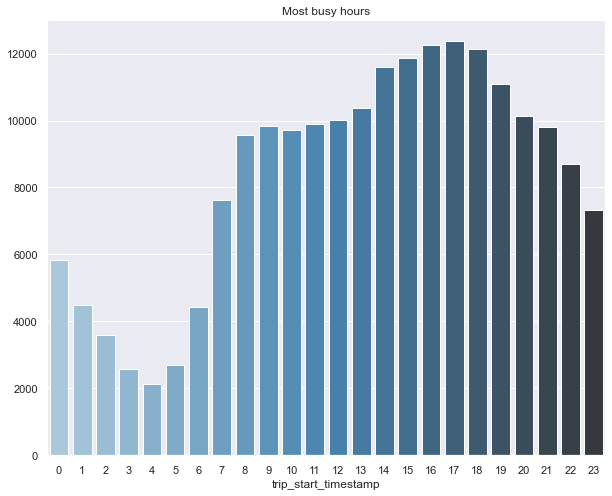

,Liczba przejazdów
0,5838
1,4496
2,3588
3,2584
4,2121
5,2689
6,4432
7,7620
8,9556
9,9825


In [47]:
hours = taxi_dataset['trip_start_timestamp'].dt.hour
hours = hours.groupby(hours).count()

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.barplot(x=hours.index, y=hours.values, palette="Blues_d").set(title='Most busy hours')
plt.show()

hours = pd.DataFrame(hours)
hours.rename(columns={'trip_start_timestamp': 'Liczba przejazdów'}, inplace=True)
hours.reset_index(drop=True)

Powyższa tabela oraz wykres przedstawiają rozkład godzin rozpoczęcia kursu przez taksówkę.  
Może być to wykorzystane podczas analizy zapotrzebowania na taksówki w ciągu dnia.  
Na wykresie, od razu rzuca się w oczy fakt, że największy popyt na usługi jest w godzinach popołudniowych,  
natomiast najmniejszy w godzinach porannych.

**Przejechany dystans**

Podstawowe statystyki:
- Średnia: 5.54 mil
- Mediana: 2.5 mil
- Minimum: 0.0 mil
- Maksimum: 388.1 mil



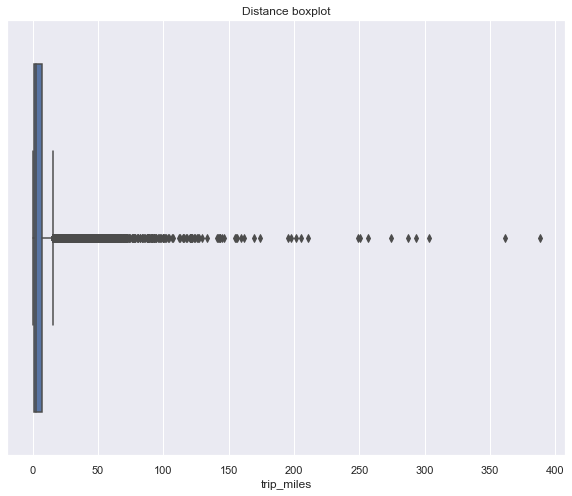

In [71]:
summary = f"""Podstawowe statystyki:
- Średnia: {round(taxi_dataset['trip_miles'].mean(), 2)} mil
- Mediana: {round(taxi_dataset['trip_miles'].median(), 2)} mil
- Minimum: {round(taxi_dataset['trip_miles'].min(), 2)} mil
- Maksimum: {round(taxi_dataset['trip_miles'].max(), 2)} mil
"""

print(summary)

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.boxplot(x=taxi_dataset['trip_miles']).set(title='Distance boxplot')
plt.show()

Na podstawie powyższego wykresu można stwiedzić, że zdecydowana większość przejazdów była na małe odległości (około 10 mil).  
Najdalszy zarejestrowany przejazd był na prawie 400mil.  
Mediana jest dużo mniejsza od średniej, co sugeruje prawostronną skośność rozkładu.


W celu poprawienia czytelności wykresu odfiltrowuje obserwacje, których wartość w kolumnnie `trip_miles` przekroczyła 30.  
Jest to jedynie około 2500 obserwacji, co stanowi nieielką część całego zbioru danych (około 1%)

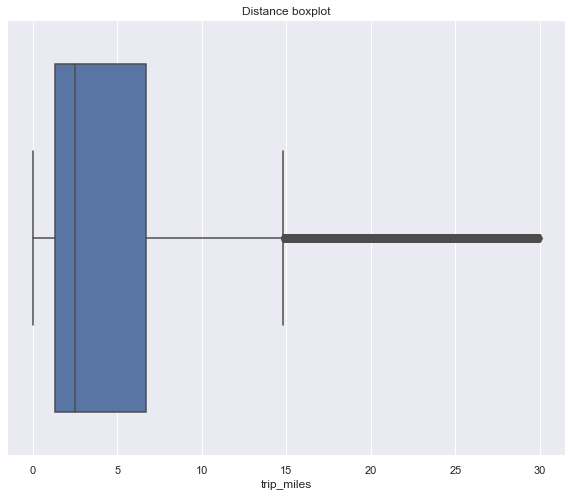

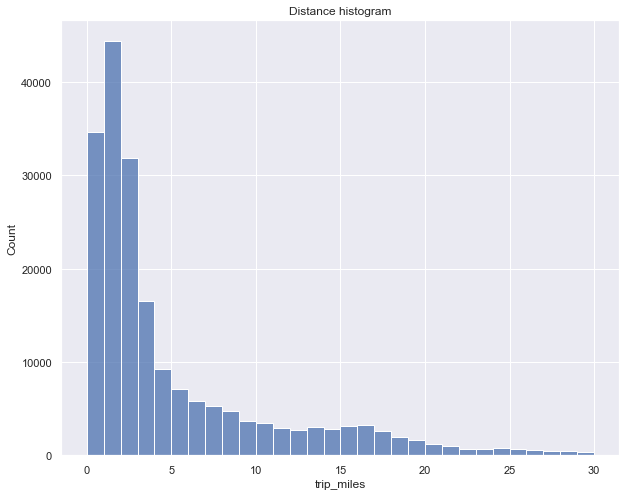

In [49]:
miles_data = taxi_dataset[taxi_dataset['trip_miles']<30]

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.boxplot(x=miles_data['trip_miles']).set(title='Distance boxplot')

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.histplot(data = miles_data,
    x='trip_miles',
    binwidth=1).set(title='Distance histogram')
plt.show()

Analizując wykresy można zauważyć, że rozkład jest prawostronnie skośny.  
Zdecydowana większość obserwacji przyjmuje wartości mniejsze od średniej.  
Asymetria spowodowana jest pojedynczymi obserwacjami, których wartość zdecydowanie przekracza średnią.

**Czas przejazdu**

Po analizie rozkładu odległości kursów można spodziewać się, że rozkład czasów kursów będzie podobny.  

Podstawowe statystyki:
- Średnia: 16.96 min
- Mediana: 12.0 min
- Minimum: 0.0 min
- Maksimum: 1439.0 min

Korelacja między czasem przejazdu, a dystansem wynosi: 0.28.


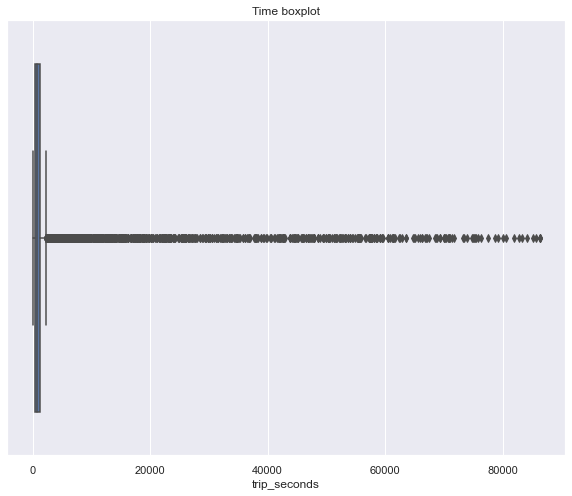

In [50]:
summary = f"""Podstawowe statystyki:
- Średnia: {round(taxi_dataset['trip_seconds'].mean()/60, 2)} min
- Mediana: {round(taxi_dataset['trip_seconds'].median()/60, 2)} min
- Minimum: {round(taxi_dataset['trip_seconds'].min()/60, 2)} min
- Maksimum: {round(taxi_dataset['trip_seconds'].max()/60, 2)} min
"""

print(summary)
print('Korelacja między czasem przejazdu, a dystansem wynosi: {}.'.format(round(taxi_dataset['trip_seconds'].corr(taxi_dataset['trip_miles']), 2)))

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.boxplot(x=taxi_dataset['trip_seconds']).set(title='Time boxplot')
plt.show()

Ponownie można zaobserwować, że zdecydowana większość obserwacji skumulowana jest po lewej stronie wykresu.

Bardzo ciekawym wynikiem jest względnie niska korelacja występująca mięzy przejechanym dystansem, a czasem.

Odfiltrowuje obserwacje utrudniające analizę rozkładu (czas kursu ponad 4000s; około 60h).

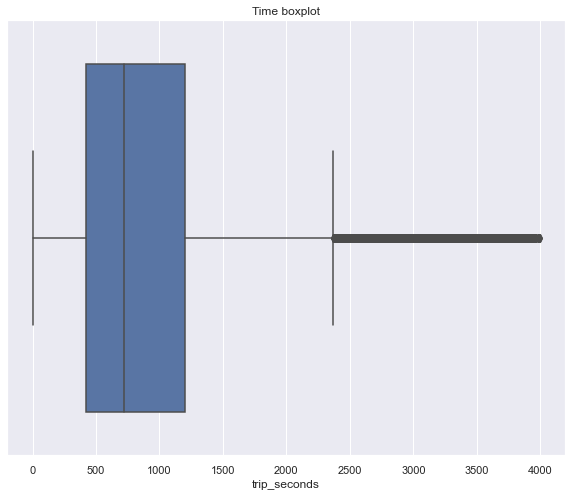

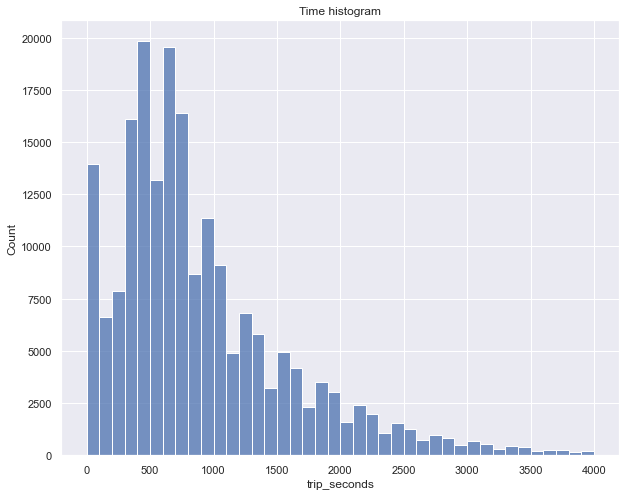

In [51]:
miles_data = taxi_dataset[taxi_dataset['trip_seconds']<4000]

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.boxplot(x=miles_data['trip_seconds']).set(title='Time boxplot')

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.histplot(data = miles_data,
    x='trip_seconds',
    binwidth=100).set(title='Time histogram')
plt.show()

Na histogramie czasów przejazdów ponownie można się przekonać, że najczęściej wybierane przez klientów są krótkie podróże (do 15 minut).

### **Opłaty**

**Kwota płatności**

In [52]:
summary = f"""Podstawowe statystyki:
- Średnia: {round(taxi_dataset['trip_total'].mean(), 2)} 
- Mediana: {round(taxi_dataset['trip_total'].median(), 2)} 
- Minimum: {round(taxi_dataset['trip_total'].min(), 2)} 
- Maksimum: {round(taxi_dataset['trip_total'].max(), 2)} 
"""

print(summary)

print('Korelacja między czasem przejazdu, a opłatą wynosi: {}.'.format(round(taxi_dataset['trip_seconds'].corr(taxi_dataset['trip_total']), 2)))
print('Korelacja między przejechanym dystansem, a opłatą wynosi: {}.'.format(round(taxi_dataset['trip_miles'].corr(taxi_dataset['trip_total']), 2)))
print('Korelacja między przejechanym dystansem, a wysokością napiwku: {}.'.format(round(taxi_dataset['trip_miles'].corr(taxi_dataset['tips']), 2)))

Podstawowe statystyki:
- Średnia: 19.34 
- Mediana: 11.5 
- Minimum: 0.0 
- Maksimum: 9299.25 

Korelacja między czasem przejazdu, a opłatą wynosi: 0.18.
Korelacja między przejechanym dystansem, a opłatą wynosi: 0.42.
Korelacja między przejechanym dystansem, a wysokością napiwku: 0.4.


Zgodnie z przypuszczeniami mediana jest znowu zdecydowanie niższa od średniej, więc rozkład znowu będzie prawostronnie skośny.

Spodziewałem się jednakże dużo silniejszej korelacji ceny z dystansem, ponieważ przejechany dystans wydaje się być głównym czynnikiem  
determinującym wysokość opłaty.

Ciekawym jest również to, że klienci, który przejeżdżają długie dystanse są skłonni dawać wyższe napiwki.

**Rodzaj płatności**

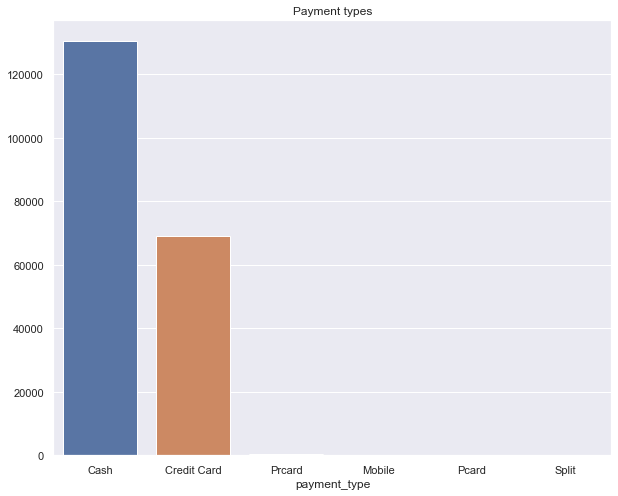

,unique_key
payment_type,
Cash,130485
Credit Card,68920
Prcard,431
Mobile,74
Pcard,65
Split,25


In [53]:
payment_data = taxi_dataset.groupby('payment_type')['unique_key'].agg(len).sort_values(ascending=False)

plt.figure(figsize = (10, 8))
sns.set_theme(style="darkgrid")
sns.barplot(x=payment_data.index, y=payment_data.values).set(title='Payment types')
plt.show()

pd.DataFrame(payment_data)

Zdecydowana większość klientów płaci gotówką lub kartą kredytową.  
Inne formy płatności zdarzały się tak rzadko, że nie zostały nawet wyświetlone na wykresie.

### **Firmy**

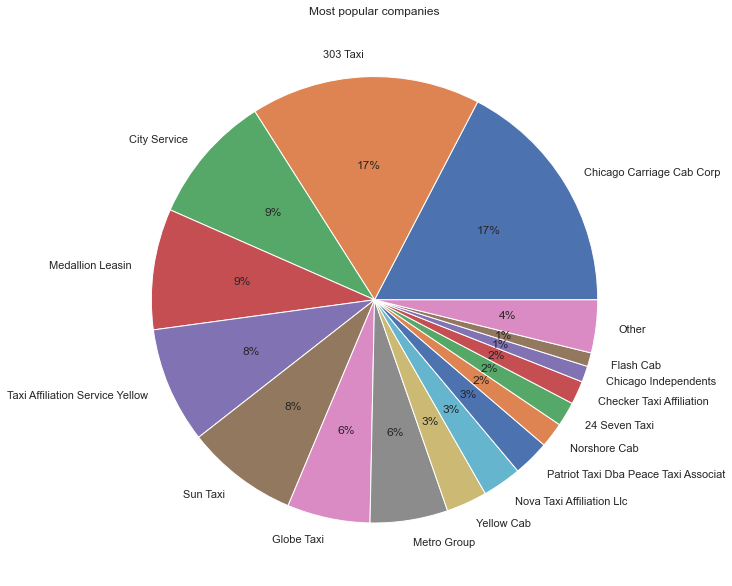

,Wykonane kursy,Udział %
Chicago Carriage Cab Corp,18457,17.357898
303 Taxi,17705,16.650679
City Service,9989,9.394162
Medallion Leasin,9306,8.751834
Taxi Affiliation Service Yellow,8937,8.404808
Sun Taxi,8625,8.111387
Globe Taxi,6387,6.006658
Metro Group,5986,5.629538
Yellow Cab,3148,2.960539
Nova Taxi Affiliation Llc,3003,2.824173


In [67]:
company_data = taxi_dataset.groupby('company')['unique_key'].agg(len).sort_values(ascending=False)

big_company = company_data[company_data.values>1000]

other = company_data[company_data.values<1000].values.sum()
small_company = pd.Series({'Other': other})

all_company = pd.concat([big_company, small_company])

plt.figure(figsize = (10, 20))
plt.pie(all_company.values, labels=all_company.index, autopct='%.0f%%')
plt.title('Most popular companies')
plt.show()

all_company = pd.DataFrame(all_company)
all_company['Udział %'] = (all_company.iloc[:,0]/sum(all_company.iloc[:,0]))*100
all_company.columns = [['Wykonane kursy', 'Udział %']]
all_company

Na podstawie powyższej tabeli oraz wykresu kołowego można stwiedzić, że do  
najpopularniejszych firm taksówkarskich w zbiorze danych należą:
- Chicago Carriage Cab Corp (17,36%)
- 303 Taxi (16.65%)
- City Service (9.39%)

Firmy, których taksówki wykonały mniej niż 1,000 kursów zostały zawartę w kategorii "Other".